<a href="https://colab.research.google.com/github/Snafkin547/Quantum-ML/blob/main/QML_Ch3_Qubit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip
!pip install kaggle

In [3]:
from google.colab import drive
import os

#Google Drive mounting to Google Colab
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/QML/Kaggle"
#Change the working directory
%cd /content/gdrive/My Drive/QML/Kaggle/

#Check if the directory was properly changed
%pwd

Mounted at /content/gdrive
/content/gdrive/My Drive/QML/Kaggle


'/content/gdrive/My Drive/QML/Kaggle'

In [4]:
import qiskit
qiskit.__qiskit_version__

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')


{'qiskit-terra': '0.18.1', 'qiskit-aer': '0.8.2', 'qiskit-ignis': '0.6.0', 'qiskit-ibmq-provider': '0.16.0', 'qiskit-aqua': '0.9.4', 'qiskit': None, 'qiskit-nature': None, 'qiskit-finance': None, 'qiskit-optimization': None, 'qiskit-machine-learning': None}

### Create a Quantum Circuit

In [6]:
from qiskit import QuantumCircuit

#Circuit with 1 qubit
qc=QuantumCircuit(1)

#Define initial state as |1>
initial_state=[0,1]

#Apply initialization operation to the qubit at position 0
qc.initialize(initial_state,0)

### Simulate Quantum Circuit

In [7]:
from qiskit import execute, Aer

#Instruct Qiskit how to simulate
backend=Aer.get_backend('statevector_simulator')

#Run the circuit
result=execute(qc, backend).result()

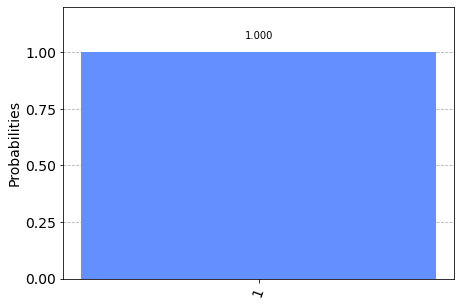

In [8]:
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Get a probability distribution
counts=result.get_counts()

# Show the histogram
plot_histogram(counts)


### Simulate with two possible states 
1.   with equal probability 50:50 
2.   with sqewed probability 25:75



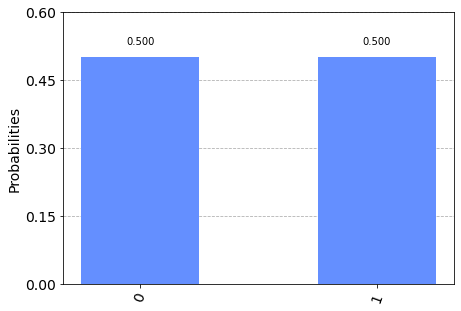

In [14]:
#Equal Probability 50:50

from math import sqrt

# Quantum circuit with 1 qubit
qc=QuantumCircuit(1)

# Defining Quantum state |psi> - Total amplitudes needs to equal 1
initial_state=[1/sqrt(2),1/sqrt(2)]

# Initialize the 0th qubit
qc.initialize(initial_state, 0)

results=execute(qc,backend).result().get_counts()

plot_histogram(results)

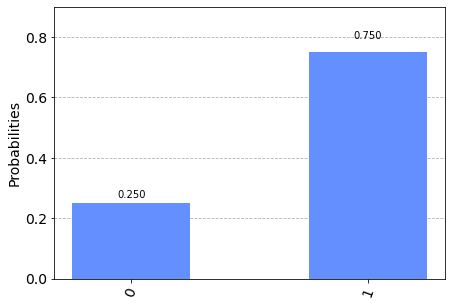

In [20]:
#Sqewed Probability 25:75

# Quantum circuit with 1 qubit
qc=QuantumCircuit(1)

# Defining Quantum state |psi> - Tottal amplitudes needs to equal 1
initial_state=[1/2,sqrt(3)/2]

# Initialize the 0th qubit
qc.initialize(initial_state, 0)

results=execute(qc,backend).result().get_counts()
plot_histogram(results)

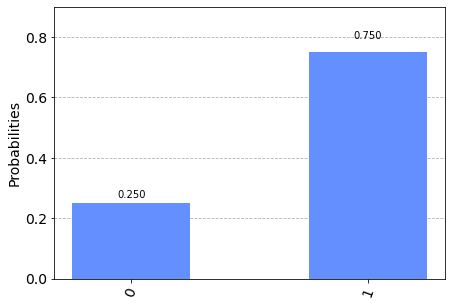

In [22]:
# Theta (angle) specifies quantum state vector |psi>

from math import pi, cos, sin
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

def get_state(theta):
  return [cos(theta/2), sin(theta/2)]

theta=-pi*2/3
qc=QuantumCircuit(1)
qc.initialize(get_state(theta),0)
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)

In [23]:
# draw QC
qc.draw(output="text")

┌──────────────────────────┐
q_0: ┤ Initialize(0.5,-0.86603) ├
     └──────────────────────────┘

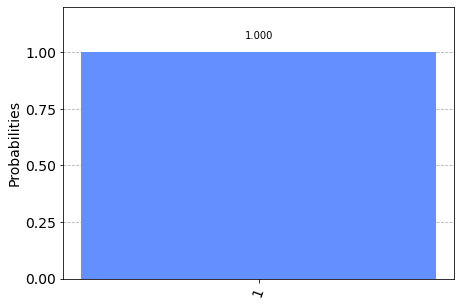

In [29]:
# Whatif analysis if we measure before 

def get_state(theta):
  return [cos(theta/2), sin(theta/2)]

theta=-pi/2
qc=QuantumCircuit(1)
qc.initialize(get_state(theta),0)

# Measure qubit
qc.measure_all()

# Return result
backend=Aer.get_backend('statevector_simulator')
result=execute(qc, backend).result()

#Counter for the result of measurement
counts=result.get_counts()

plot_histogram(counts)

In [30]:
# draw QC after measurement
qc.draw(output="text")

┌──────────────────────────────┐ ░ ┌─┐
   q_0: ┤ Initialize(0.70711,-0.70711) ├─░─┤M├
        └──────────────────────────────┘ ░ └╥┘
meas: 1/════════════════════════════════════╩═
                                            0

### Parameterized Quantum Circuit (PQC)

In [32]:
import numpy as np
with open('./train.npy', 'rb') as f:
  train_input = np.load(f)
  train_labels = np.load(f)

with open('./test.npy', 'rb') as f:
  test_input = np.load(f)
  test_labels = np.load(f)

In [43]:
#Ratio of True Negatives amongst all actual negatives
def specificity(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[0][1]) if (matrix[0][0]+matrix[0][1] > 0) else 0

## Negative Predictive Value
def npv(matrix):
    return matrix[0][0]/(matrix[0][0]+matrix[1][0]) if (matrix[0][0]+matrix[1][0] > 0) else 0

In [36]:
#Runner for classifier
def run(f_classify, x):
  return list(map(f_classify, x))

In [44]:
def classifier_report(name, run, classify, input, labels):
  cr_predictions=run(classify, input)
  cr_cm=confusion_matrix(labels, cr_predictions)
  
  cr_precision=precision_score(labels, cr_predictions)
  cr_recall=recall_score(labels, cr_predictions)
  cr_specificity=specificity(cr_cm)
  cr_npv=npv(cr_cm)
  cr_level=0.25*(cr_precision+cr_recall+cr_specificity+cr_npv)

  print('The precision score of the {} classifier is {:.2f}'.format(name, cr_precision))
  print('The recall score of the {} classifier is {:.2f}'.format(name, cr_recall))
  print('The specificity score of the {} classifier is {:.2f}'.format(name, cr_specificity))
  print('The npv score of the {} classifier is {:.2f}'.format(name, cr_npv))
  print('The information level is: {:.2f}'.format(cr_level))

In [38]:
from qiskit import execute, Aer, QuantumCircuit
from math import sqrt
from sklearn.metrics import recall_score, precision_score, confusion_matrix

def pqc_classify(backend, passenger_state):
  qc=QuantumCircuit(1)
  qc.initialize(passenger_state,0)
  qc.measure_all()
  result=execute(qc, backend).result()
  counts=result.get_counts(qc)
  # Get 0 or 1
  return int(list(map(lambda item: item[0], counts.items()))[0])

In [45]:
backend=Aer.get_backend('statevector_simulator')
initial_state=[1/sqrt(2), 1/sqrt(2)]

classifier_report("Random PQC",
                  run,
                  lambda passenger: pqc_classify(backend, initial_state),
                  train_input,
                  train_labels)

The precision score of the Random PQC classifier is 0.37
The recall score of the Random PQC classifier is 0.49
The specificity score of the Random PQC classifier is 0.48
The npv score of the Random PQC classifier is 0.61
The information level is: 0.49


### Variational Hybrid Quantum-Classical Algorithm
  Preprocessing and post processing are done in classical computation, while body part is quantum computation

    • Pre-processing

    • PQC
    
    • Post-processing

In [50]:
def pre_process(passenger):
  """
  passenger −− the normalized (array of numeric data) passenger data
  returns a valid quantum state
  """
  quantum_state = [1/sqrt(2), 1/sqrt(2)]
  return quantum_state

In [53]:
# PQC

def pqc(backend, quantum_state):
  qc=QuantumCircuit(1)
  qc.initialize(quantum_state,0)
  qc.measure_all()
  result=execute(qc, backend).result()
  counts=result.get_counts(qc)
  # Get 0 or 1
  return counts


In [48]:
# Post processing

def post_process(counts):
  return int(list(map(lambda item: item[0], counts.items()))[0])


In [54]:
backend=Aer.get_backend('statevector_simulator')
initial_state=[1/sqrt(2), 1/sqrt(2)]

classifier_report("Variational",
                  run,
                  lambda passenger: post_process(pqc(backend, pre_process(passenger))),
                  train_input,
                  train_labels)

The precision score of the Variational classifier is 0.38
The recall score of the Variational classifier is 0.50
The specificity score of the Variational classifier is 0.49
The npv score of the Variational classifier is 0.61
The information level is: 0.49


In [55]:
# Assume each feature (Age etc.) are independent of each other

def weigh_feature(feature, weight):
  return feature*weight


In [56]:
from functools import reduce

def get_overall_probability(features, weights):
  """
  features: list of features of a passenger
  weights: list of all features' weights
  """

  #reduce features and weights into a signle number
  return reduce(
      lambda result, data: result+weigh_feature(*data), zip(features, weights),
      0
  )
'''We reduce this list of (feature, weight) into a single number (line 8). Then, we
call the weight_feature-function for each of the tuples and add up the results
(line 9), starting with the value 0 (line 11).'''

In [58]:
# Calculate weights of the features, which must be similar across passengers, to put them for prediction
'''The Pearson correlation is best suited for linear continuous variables,
whereas the Spearman correlation also works for monotonic ordinal variables.
Since we have some categorical data (Plass, Sex, and Embarked), we use
the Spearman method to calculate the correlation coefficient'''

from scipy.stats import spearmanr

columns=[list(map(lambda passenger: passenger[i], train_input)) for i in range(0,7)]

# spearmanr returns correlation & p-value, as we only want correlation, it uses [0]
correlations=list(map(lambda col: spearmanr(col, train_labels)[0], columns))
correlations

[-0.34151959779201324,
 -0.5545767391790297,
 -0.051304745706990805,
 0.08900563280907048,
 0.14287867313093622,
 0.3280737376154011,
 -0.15452237217995035]

In [59]:
# Putting the weights into pre-processing 
from math import pi, sin, cos

def get_state(theta):
  return [cos(theta/2), sin(theta/2)]

def pre_process_weighted(passenger):
  #Get overall prob
  mu=get_overall_probability(passenger, correlations)

  #Get QS
  quantum_state=get_state((1-mu)*pi)
  return quantum_state


In [61]:
# Training result

backend = Aer.get_backend('statevector_simulator')

classifier_report("Variational",
  run,
  lambda passenger: post_process(pqc(backend, pre_process_weighted(
  passenger))),
  train_input,
  train_labels)

The precision score of the Variational classifier is 0.70
The recall score of the Variational classifier is 0.63
The specificity score of the Variational classifier is 0.84
The npv score of the Variational classifier is 0.78
The information level is: 0.74


In [62]:
# Testing result

backend = Aer.get_backend('statevector_simulator')

classifier_report("Variational",
  run,
  lambda passenger: post_process(pqc(backend, pre_process_weighted(
  passenger))),
  test_input,
  test_labels)

The precision score of the Variational classifier is 0.80
The recall score of the Variational classifier is 0.59
The specificity score of the Variational classifier is 0.91
The npv score of the Variational classifier is 0.78
The information level is: 0.77
